In [1]:
import pandas as pd
import numpy as np
import sklearn.model_selection as sk_ms
import warnings
warnings.filterwarnings('ignore')

In [8]:
train=pd.read_excel('train_dummy.xlsx')

In [10]:
train=train.iloc[:,1:]
train

,id,description,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,neighbourhood_cleansed#Battery Park City,...,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent,price
0,44117862,A truly epic loft in the heart of Greenwich vi...,0,1,1,1,0,0,0,0,...,-0.593900,-0.436162,2.207695,-0.430537,-0.714281,0.520142,-0.345682,-0.309587,-0.679270,499.0
1,659230581060046976,A spacious unit which sleeps eight people on ...,0,1,1,0,0,1,0,0,...,2.628974,-0.548005,1.102128,-0.413495,-0.790039,0.520142,0.264057,0.203000,0.044344,223.0
2,32789340,Charming one bedroom apartment in the heart of...,0,1,1,1,0,0,0,0,...,-0.593900,-0.520044,-0.740483,-0.226034,-0.044613,0.409726,-0.345682,-0.277550,0.285549,170.0
3,48425839,The apartment is located in the charming neigh...,1,1,1,1,0,0,0,0,...,-0.593900,-0.492083,0.049208,0.319305,-0.797900,0.244102,-0.309097,0.743046,0.767958,145.0
4,654352127095037056,Centrally located on Central Park South this s...,0,1,1,1,0,0,0,0,...,-0.593900,-0.548005,2.155049,-0.396453,-0.794327,0.520142,-0.345682,0.116043,-2.126497,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11570,51715942,Rare opportunity to rent at a 5th Avenue addre...,0,1,0,1,0,0,0,0,...,-0.593900,-0.520044,0.786252,0.046635,-0.799330,0.188894,-0.345682,0.857463,1.250367,450.0
11571,144148,"Amazing room, with private roof deck. Sits in ...",0,1,1,0,0,1,0,0,...,-0.593900,0.262854,-0.740483,0.097761,0.940235,-0.128551,-0.345682,-0.268397,-1.402883,67.0
11572,616834723568263936,-Great location - L/Q/R/N/W/4/5/6/ train line...,0,1,1,1,0,0,0,0,...,0.480392,-0.436162,-0.687837,-0.362369,-0.799330,-0.307976,-0.345682,0.592017,0.044344,205.0
11573,50210777,"Our comfortable, safe, cozy and relaxing 4 Bed...",0,1,1,1,0,0,0,0,...,3.703265,0.262854,2.418279,-0.447578,2.002985,0.257904,-0.345682,-0.419427,1.009162,449.0


In [11]:
test=pd.read_excel('test_dummy.xlsx')
test=test.iloc[:,1:]
test

,id,description,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type#Entire home/apt,room_type#Hotel room,room_type#Private room,room_type#Shared room,neighbourhood_cleansed#Battery Park City,...,beds,minimum_nights,availability_60,number_of_reviews,last_review,review_scores_rating,calculated_host_listings_count,reviews_per_month,amenities_percent,price
0,5178,Please don鈥檛 expect the luxury here just a bas...,0,1,0,0,0,1,0,0,...,-0.593900,-0.520044,-0.529899,8.925436,-0.790039,-0.542610,-0.345682,1.132063,0.044344,68
1,593311739520916992,This cubicle room is just for you and nobody e...,0,1,1,0,0,1,0,0,...,-0.593900,-0.548005,0.944190,-0.021532,-0.794327,-0.363184,-0.089591,1.900943,0.044344,92
2,47269867,The best Central location. <br />Union Square ...,0,1,1,1,0,0,0,0,...,-0.593900,-0.380241,1.312712,-0.413495,-0.788609,0.520142,-0.345682,-0.369083,-0.438065,414
3,4509560,BRAND NEW !!! Fully furnished Studio Apartment...,0,1,1,1,0,0,0,0,...,0.480392,0.262854,-0.740483,-0.140825,-0.659250,-0.376986,-0.089591,-0.327893,1.009162,130
4,1118031,Private Bedroom for one in the best neighborho...,1,1,0,0,0,1,0,0,...,-0.593900,0.011208,0.680960,0.489723,-0.761451,0.437330,-0.321292,-0.190593,1.009162,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2874,51262978,Welcome to my comfortable and well designed 2B...,1,1,1,1,0,0,0,0,...,1.554683,0.262854,-0.687837,-0.277160,-0.784321,0.520142,-0.345682,-0.080753,0.044344,300
2875,52553162,No human interaction is needed during your sta...,0,1,0,1,0,0,0,0,...,-0.593900,-0.548005,-0.740483,-0.004491,-0.799330,-0.432194,0.178694,0.674396,-0.438065,189
2876,27788826,Come explore New York City in this delightful ...,0,1,1,1,0,0,0,0,...,-0.593900,0.262854,-0.740483,-0.396453,0.236262,0.520142,-0.345682,-0.391967,-0.438065,123
2877,18227529,"Art Deco 1 Bed morning in Morningside Hts, nea...",0,1,1,1,0,0,0,0,...,1.554683,-0.520044,-0.740483,1.086187,-0.028890,0.354518,-0.333487,0.221307,1.009162,146


In [14]:
col=train.columns.values.tolist()
col.remove('price') 
x_train = train[col]
y_train = train[['price']]
x_test = test[col]
y_test = test[['price']]

In [16]:
for i in ['id','description']:
    del x_train[i]
    del x_test[i]

## 1. Without PCA

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
model1 = RandomForestRegressor()
# regr = RandomForestRegressor(random_state=100,
#                              bootstrap=True,
#                              max_depth=2,
#                              max_features=2,
#                              min_samples_leaf=3,
#                              min_samples_split=5,
#                              n_estimators=3)
model1.fit(x_train, y_train)

RandomForestRegressor()

In [20]:
model1.n_estimators

100

In [21]:
print("Training R-Square",model1.score(x_train,y_train))
print("Testing R-Square",model1.score(x_test,y_test))

Training R-Square 0.9493665115742432
Testing R-Square 0.6650604678266688


### （1)Feature importance

Text(0.5, 0, 'Relative Importance')

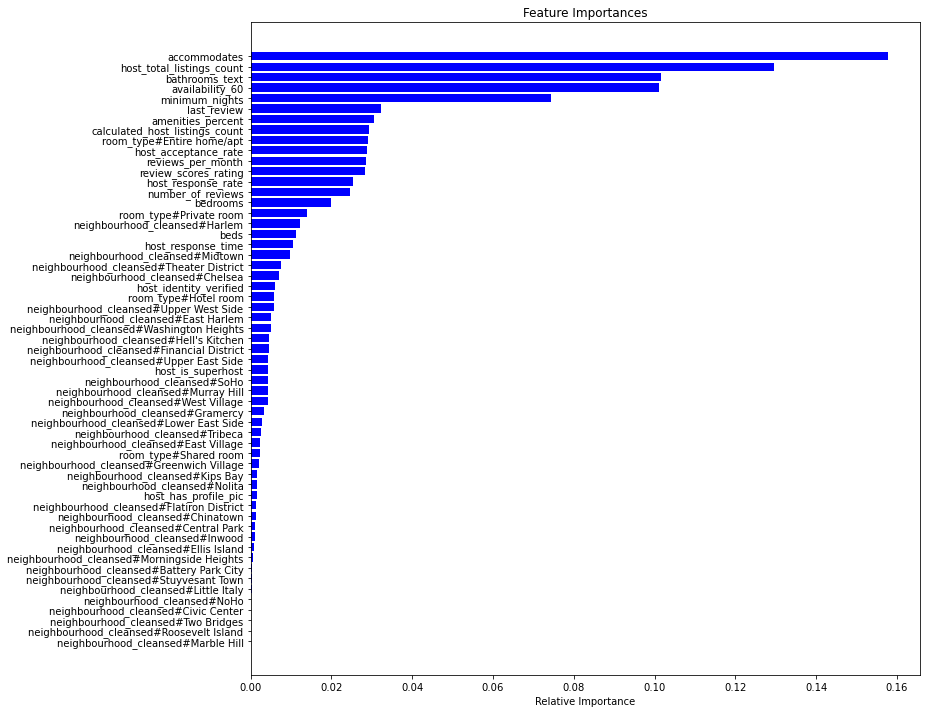

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
importances = model1.feature_importances_
feature_names=list(x_train.columns)
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)),feature_names)
plt.yticks(range(len(indices)),np.array(feature_names)[indices])
plt.xlabel('Relative Importance')

## with PCA

In [66]:

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

data=x_train
pca = PCA(n_components=data.shape[1])
principalComponents = pca.fit_transform(data)
pca.explained_variance_ratio_

array([1.78559788e-01, 1.41987918e-01, 1.25594588e-01, 7.50356984e-02,
       6.17242170e-02, 5.75805200e-02, 5.22218663e-02, 4.85049661e-02,
       4.39603469e-02, 3.43670522e-02, 3.07798011e-02, 2.22284774e-02,
       1.92959657e-02, 1.58146425e-02, 1.19958752e-02, 9.90599447e-03,
       6.80590371e-03, 5.96164742e-03, 5.51465331e-03, 5.28721433e-03,
       5.20485439e-03, 4.74477194e-03, 4.34317792e-03, 3.83617360e-03,
       3.28033543e-03, 2.88065545e-03, 2.54905260e-03, 2.20119127e-03,
       1.88453493e-03, 1.72199659e-03, 1.44665624e-03, 1.34622281e-03,
       1.24060233e-03, 1.06588211e-03, 8.99202448e-04, 7.90260116e-04,
       7.71412998e-04, 7.42178043e-04, 6.81168692e-04, 6.47003843e-04,
       6.40633435e-04, 5.96058203e-04, 5.83080386e-04, 4.92758644e-04,
       4.25966687e-04, 3.24911438e-04, 3.03114650e-04, 2.62322724e-04,
       2.46318034e-04, 1.70626689e-04, 1.61046059e-04, 1.44810588e-04,
       1.33788591e-04, 8.49979986e-05, 2.50954616e-05, 1.13553446e-29,
      

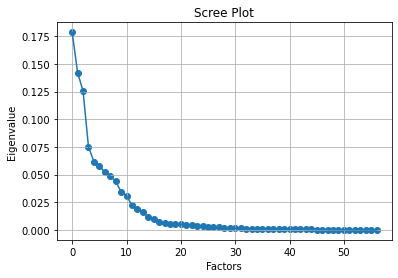

In [44]:
import matplotlib.pyplot as plt
importance = pca.explained_variance_ratio_
plt.scatter(range(len(x_train.columns)),importance)
plt.plot(range(len(x_train.columns)),importance)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [69]:
sum(pca.explained_variance_ratio_[:20])

0.9531271366672408

In [54]:
pca = PCA(20).fit(x_train)
def preprocessor(data):
    preprocessed_data=data
    principalComponents = pca.transform(preprocessed_data)
    preprocessed_data = pd.DataFrame(data=principalComponents)
    return preprocessed_data

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
model2 = RandomForestRegressor()
model2.fit(preprocessor(x_train), y_train)

RandomForestRegressor()

In [56]:
print("Training R-Square",model2.score(preprocessor(x_train),y_train))
print("Testing R-Square",model2.score(preprocessor(x_test),y_test))

Training R-Square 0.9391577359378279
Testing R-Square 0.5731619675586734


## So we decide to train the model without PCA

In [23]:
from sklearn.model_selection import GridSearchCV
import numpy as np


n_estimators_range=[int(x) for x in np.linspace(start=100,stop=500,num=5)]
max_depth_range=[int(x) for x in np.linspace(20,100,num=5)]
min_samples_split_range=[1,2,4]
# min_samples_leaf_range=[1,2,4]
# # bootstrap_range=[True,False]

random_forest_hp_range={'n_estimators':n_estimators_range ,
                        'max_depth':max_depth_range,
                        'min_samples_split':min_samples_split_range
#                         'min_samples_leaf':min_samples_leaf_range 
                       # 'bootstrap':bootstrap_range
                        }
gridmodel = GridSearchCV(RandomForestRegressor(), param_grid=random_forest_hp_range, cv=5)

In [24]:
gridmodel.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20, 40, 60, 80, 100],
                         'min_samples_split': [1, 2, 4],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [25]:
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.653
best parameters: {'max_depth': 100, 'min_samples_split': 2, 'n_estimators': 400}


In [28]:
model1 = RandomForestRegressor(n_estimators=400,
                              max_depth=100,
                              min_samples_split=2)
model1.fit(x_train, y_train)

RandomForestRegressor(max_depth=100, n_estimators=400)

In [71]:
print("Training R-Square",model1.score(x_train,y_train))
print("Testing R-Square",model1.score(x_test,y_test))

Training R-Square 0.9514947647066315
Testing R-Square 0.667814286352943


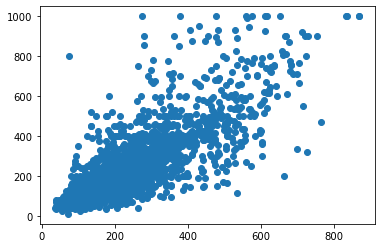

In [30]:
predict_list=model1.predict(x_test)
plt.scatter(predict_list,test['price'])

In [32]:
test['predict']=predict_list
test['price_diff']=test['predict']-test['price']

In [39]:
test['price_diff'].describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])

count    2879.000000
mean        0.501728
std        95.642992
min      -724.458750
10%       -94.204000
20%       -33.896500
30%       -13.389000
40%        -1.105000
50%         8.320000
60%        20.287000
70%        33.107000
80%        51.727833
90%        84.553760
max       463.765000
Name: price_diff, dtype: float64

<AxesSubplot:xlabel='price_diff', ylabel='Density'>

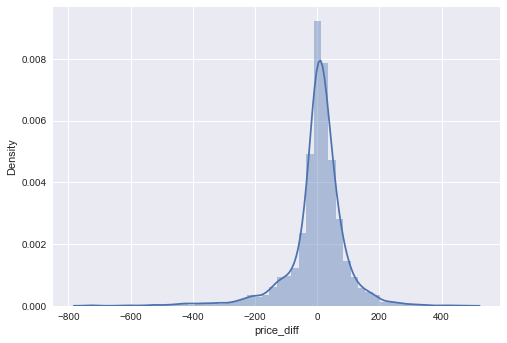

In [63]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
from scipy import stats
sns.distplot(test['price_diff'],kde=True)

In [40]:
df_text_mining=test[['id','description','price','predict','price_diff']]

In [42]:
df_text_mining.to_csv('test_tree_dummy.csv')